# Clinical Deterioration Prediction Model: Inferential Statistics

`This notebook includes a Statistical Data Analysis based on the final dataset prepared for a Clinical Deterioration (cd) Prediction Model.`

`To learn more about the data source, descriptive statistics and additional exploratory data analysis please visit https://github.com/abebual/Exploratory-Data-Analysis-Clinical-Deterioration`

`Abebual Demilew | github.com/abebual | @evidence2policy`
____


In [1]:
import os
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt


In [2]:
os.getcwd()

'C:\\Users\\abebu\\Dropbox\\Data Science\\Projects\\Capstone Project 1\\Potential Projects\\9. MIMIC\\Statistical_Data_Analysis'

In [3]:
saps=pd.read_csv('Data/saps2_f.csv', header=0, index_col=0)

In [4]:
saps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61117 entries, 0 to 61116
Data columns (total 21 columns):
SUBJECT_ID     61117 non-null int64
HADM_ID        61117 non-null int64
ICUSTAY_ID     61117 non-null int64
los            61117 non-null float64
admission      61117 non-null int64
hdeath         61117 non-null int64
death          61117 non-null int64
ud             61117 non-null float64
bun            61117 non-null float64
Bicarbonate    61117 non-null float64
ventilation    61117 non-null float64
Potassium      61117 non-null float64
Sodium         61117 non-null float64
Temp           61117 non-null float64
Bilirubin      61117 non-null float64
WBC            61117 non-null float64
hr             61117 non-null float64
gcs            61117 non-null float64
bp             61117 non-null float64
AGE            61117 non-null float64
UO             61117 non-null float64
dtypes: float64(15), int64(6)
memory usage: 10.3 MB


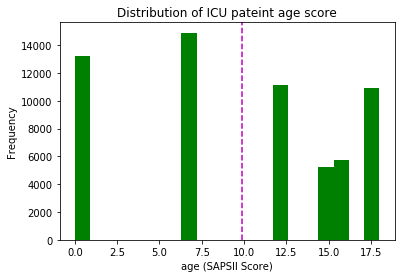

In [5]:
#Inferential Statistics - Frequentism
#1.AGE Score
mean_age=np.mean(saps.AGE)
std_age=np.std(saps.AGE)

_ = plt.hist(saps.AGE, bins=20, color='g')
_ = plt.xlabel('age (SAPSII Score)')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of ICU pateint age score')
_ = plt.axvline(mean_age, color='m', linestyle='--')

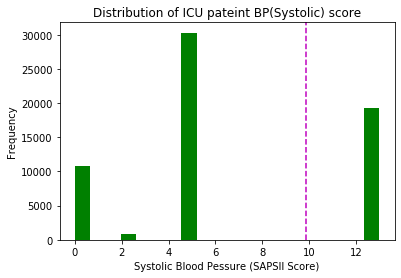

In [6]:
#Inferential Statistics - Frequentism
#2.Blood pressure (systolic) Score
mean_bp=np.mean(saps.bp)
std_bp=np.std(saps.bp)

_ = plt.hist(saps.bp, bins=20, color='g')
_ = plt.xlabel('Systolic Blood Pessure (SAPSII Score)')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of ICU pateint BP(Systolic) score')
_ = plt.axvline(mean_age, color='m', linestyle='--')

In [7]:
saps

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,admission,hdeath,death,ud,bun,Bicarbonate,...,Potassium,Sodium,Temp,Bilirubin,WBC,hr,gcs,bp,AGE,UO
0,268,110404,280836,3.2490,8,1,1,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,26.0,13.0,12.0,0.000
1,269,106296,206613,3.2788,8,0,0,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,0.750
2,270,188028,220345,2.8939,0,0,0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,11.0,0.0,13.0,18.0,0.540
3,271,173727,249196,2.0600,8,0,0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,1.195
4,272,164716,210407,1.6202,8,0,0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,12.0,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,94944,143774,201233,2.1894,8,0,0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.0,26.0,13.0,16.0,1.815
61113,94950,123750,283653,2.4942,8,0,0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.0,5.0,0.0,18.0,0.360
61114,94953,196881,241585,0.9259,0,0,1,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,7.0,5.0,7.0,0.550
61115,94954,118475,202802,2.3346,0,0,0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,26.0,13.0,12.0,0.950


In [8]:
cols=saps.columns.tolist()

In [9]:
cols=['SUBJECT_ID',
 'HADM_ID',
 'ICUSTAY_ID',
 'los',
 'hdeath',
 'death',
 'admission',
 'ud',
 'bun',
 'Bicarbonate',
 'ventilation',
 'Potassium',
 'Sodium',
 'Temp',
 'Bilirubin',
 'WBC',
 'hr',
 'gcs',
 'bp',
 'AGE',
 'UO']

In [10]:
saps=saps[cols]
saps

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,hdeath,death,admission,ud,bun,Bicarbonate,...,Potassium,Sodium,Temp,Bilirubin,WBC,hr,gcs,bp,AGE,UO
0,268,110404,280836,3.2490,1,1,8,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,26.0,13.0,12.0,0.000
1,269,106296,206613,3.2788,0,0,8,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,0.750
2,270,188028,220345,2.8939,0,0,0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,11.0,0.0,13.0,18.0,0.540
3,271,173727,249196,2.0600,0,0,8,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,1.195
4,272,164716,210407,1.6202,0,0,8,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,12.0,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,94944,143774,201233,2.1894,0,0,8,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.0,26.0,13.0,16.0,1.815
61113,94950,123750,283653,2.4942,0,0,8,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.0,5.0,0.0,18.0,0.360
61114,94953,196881,241585,0.9259,0,1,0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,7.0,5.0,7.0,0.550
61115,94954,118475,202802,2.3346,0,0,0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,26.0,13.0,12.0,0.950


In [11]:
saps['saps2']= saps.iloc[:, -15:].sum(axis=1)

C:\Users\abebu\DS\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
saps.head()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,hdeath,death,admission,ud,bun,Bicarbonate,...,Sodium,Temp,Bilirubin,WBC,hr,gcs,bp,AGE,UO,saps2
0,268,110404,280836,3.2490,1,1,8,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,11.0,26.0,13.0,12.0,0.000,82.000
1,269,106296,206613,3.2788,0,0,8,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,0.750,37.750
2,270,188028,220345,2.8939,0,0,0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,11.0,0.0,13.0,18.0,0.540,45.540
3,271,173727,249196,2.0600,0,0,8,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,1.195,25.195
4,272,164716,210407,1.6202,0,0,8,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,12.0,0.450,28.450


[Text(0.5, 1, 'Correlations: ICU Patients SAPSII Score')]

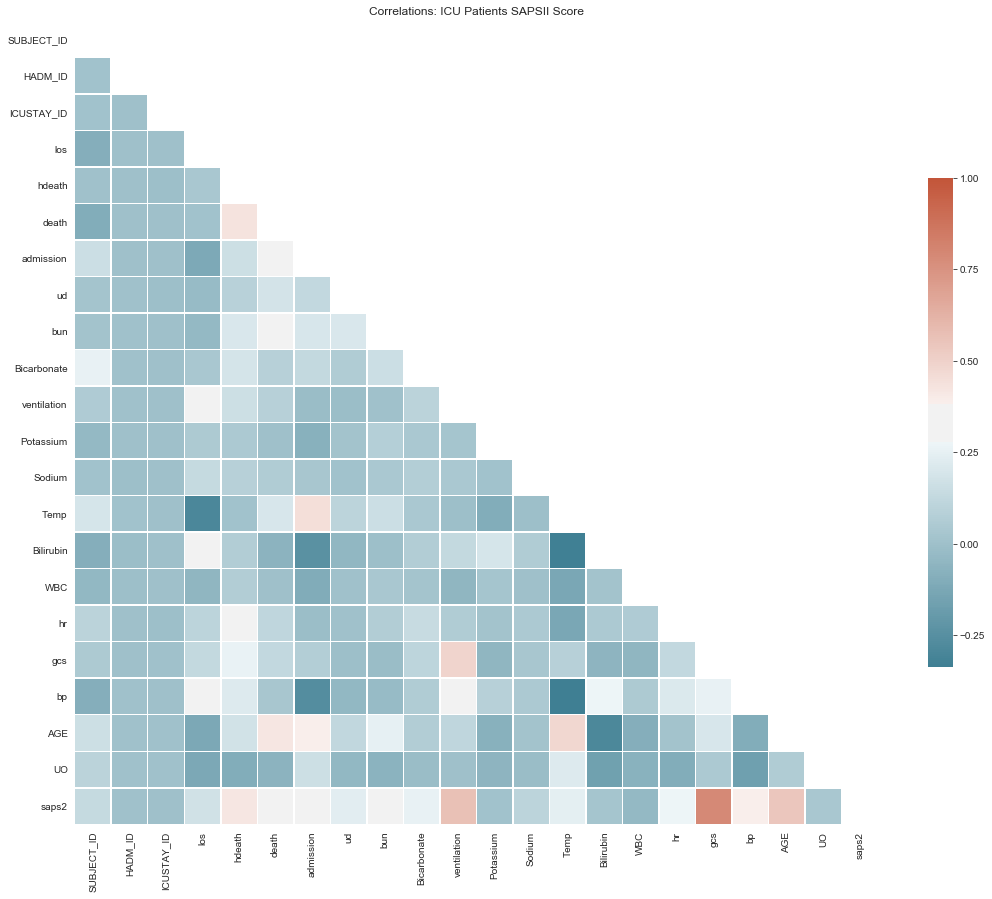

In [13]:
import seaborn as sns
# Compute correlations
corr = saps.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Add diverging colormap
#cmap =sns.diverging_palette(150, 275, s=80, l=55, n=12)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set (title='Correlations: ICU Patients SAPSII Score')

## Inferential Statistics - Frequentist

In [14]:
survived=saps.AGE.loc[saps.hdeath==0]
deceased=saps.AGE.loc[saps.hdeath==1]

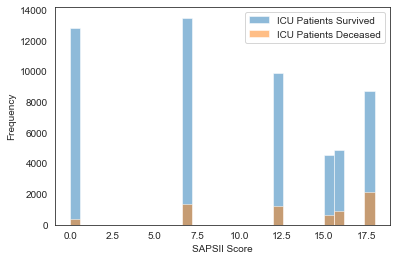

In [15]:
_ = plt.hist(survived, bins=30, alpha=0.5, label='ICU Patients Survived')
_ = plt.hist(deceased, bins=30, alpha=0.5, label='ICU Patients Deceased')
_ = plt.xlabel('SAPSII Score')
_ = plt.ylabel('Frequency')
_ = plt.legend()

In [16]:
# perform hypothesis test of spas2 score between those passed away at hospital and survived

from scipy.stats import ttest_ind
survived=saps.saps2.loc[saps.hdeath==0]
deceased=saps.saps2.loc[saps.hdeath==1]
ttest_ind(survived, deceased)


Ttest_indResult(statistic=-113.38421526216234, pvalue=0.0)

`Indipendent ttest result shows there is a statistically significant diffrence (t=-113, pvalue=0.0) saps2 scores of icu patients who have survived and deceased.`

In [17]:
# perform hypothesis test of age score between those passed away at hospital and survived

survived=saps.AGE.loc[saps.hdeath==0]
deceased=saps.AGE.loc[saps.hdeath==1]
ttest_ind(survived, deceased)

Ttest_indResult(statistic=-43.75804024805559, pvalue=0.0)

`so does age ... etc, the same can be done for other variables.`

In [18]:
survived=saps.saps2.loc[saps.hdeath==0]
deceased=saps.saps2.loc[saps.hdeath==1]
ttest_ind(survived, deceased, equal_var=False)

Ttest_indResult(statistic=-110.23869745713934, pvalue=0.0)

## Inferential Statistics - Bootstrapping

In [19]:
np.random.seed(47)
N_rep = 10000
bs_means=np.empty(N_rep)

for i in range (N_rep):
    bs_sample = np.random.choice(saps.saps2, size=len(saps.saps2))
    bs_means[i] = np.mean(bs_sample)

bs_mean, bs_std=np.mean(bs_means), np.std(bs_means)
lower_limit=bs_mean-(1.64*bs_std)
lower_limit

42.88408855744203

In [20]:

survived=saps.saps2.loc[saps.death==0]
deceased=saps.saps2.loc[saps.death==1]

np.random.seed(47)
bs_std_diff=np.empty(N_rep)

for i in range (N_rep):
    bs_survived = np.random.choice(survived, size=len(survived))
    bs_deceased = np.random.choice(deceased, size=len(deceased))
    bs_std_diff[i]=np.std(bs_deceased) - np.std(bs_survived)
    
bs_std_diff_mean, bs_std_diff_std=np.mean(bs_std_diff), np.std(bs_std_diff)
ci_std_diff=[bs_std_diff_mean - 1.96*bs_std_diff_std, bs_std_diff_mean + 1.96*bs_std_diff_std]

print('The 95% confidence interval for the difference between the standard deviations\
 of survived and deceased SAPSII Score is: ', ci_std_diff)

The 95% confidence interval for the difference between the standard deviations of survived and deceased SAPSII Score is:  [0.28484245733704616, 0.6520856816890048]


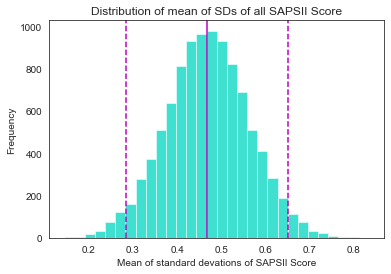

In [21]:
# Plot the histogram of values and mark the locations of the percentiles
_ = plt.hist(bs_std_diff, bins=30, linewidth=0.5, color='turquoise')
_ = plt.xlabel('Mean of standard devations of SAPSII Score')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of mean of SDs of all SAPSII Score')
_ = plt.axvline(bs_std_diff_mean, color='m')
_ = plt.axvline(ci_std_diff[0], color='m', linestyle='--')
_ = plt.axvline(ci_std_diff[1], color='m', linestyle='--')

In [22]:
#Perform a bootstrapped hypothesis test at the 5% significance level to calculate the p-value of the observed difference between survived and deceased icu patients.

# Compute the difference in mean charges: diff_means
diff_means=np.mean(deceased) - np.mean(survived)
diff_means

14.74874822658952

In [23]:
#Define a function to generate a permutation sample from two data sets (insured and uninsured)
def permutation_sample(data1, data2):

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [24]:
#A bootstrap hypothesis test for difference of means
np.random.seed(47)
deceased_shifted=deceased - np.mean(deceased) + np.mean(survived)
perm_mean_replicates=np.empty(N_rep)
for i in range(N_rep):
    perm_survived, perm_deceased=permutation_sample(survived, deceased_shifted)
    perm_mean_replicates[i]=np.mean(perm_survived) - np.mean(perm_deceased)
    
bs_mean_diff=np.empty(N_rep)
for i in range(N_rep):
    bs_mean_diff[i]=np.mean(bs_survived) - np.mean(np.random.choice(deceased_shifted, len(deceased_shifted)))

# Compute p-value: perm_p, p
perm_p = np.sum(perm_mean_replicates>=diff_means)/len(perm_mean_replicates)
print('Permuation Pvalue: ', perm_p)
p=np.sum(bs_mean_diff>=diff_means)/len(bs_mean_diff)
print('Pvalue: ', p)


Permuation Pvalue:  0.0
Pvalue:  0.0


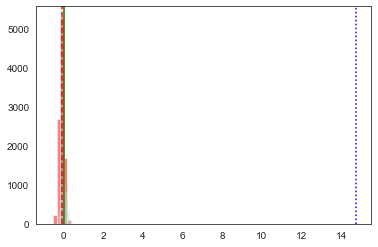

In [25]:
_=plt.hist(bs_mean_diff, alpha=0.5, bins=5, color='red')
_=plt.hist(perm_mean_replicates, linewidth=0.5, alpha=0.25, bins=30, color='turquoise')
_=plt.axvline(np.mean(perm_mean_replicates), color='g')
_=plt.axvline(np.mean(bs_mean_diff), color='r', linestyle='--')
_=plt.axvline(np.mean(diff_means), color='b', linestyle=':')


## Inferential Statistics - Bayesian

In [26]:
import pymc3 as pm
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [27]:
#Initial parameter estimation for the gamma distribution's  𝛼  and  𝛽 
alpha_est = np.mean(deceased)**2 / np.var(deceased)
beta_est = np.var(deceased) / np.mean(deceased)
alpha_est, beta_est


(7.702206830403064, 6.742807762839468)

In [28]:
#Initial simulation - 
seed(47)
n_survived = len(survived)
n_deceased = len(deceased)
deceased_model_rvs = gamma(alpha_est, scale=beta_est).rvs(n_deceased)

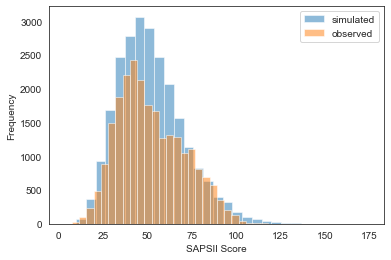

In [29]:
_ = plt.hist(deceased_model_rvs, bins=30, alpha=0.5, label='simulated')
_ = plt.hist(deceased, bins=30, alpha=0.5, label='observed')
_ = plt.xlabel('SAPSII Score')
_ = plt.ylabel('Frequency')
_ = plt.legend()

In [32]:
#creating a PyMC3 model
# PyMC3 Gamma seems to use rate = 1/beta
rate_est = 1/beta_est
# Initial parameter estimates we'll use below
alpha_est, rate_est
mean=np.mean(deceased)
sd=np.std(deceased)

In [44]:
with pm.Model() as a_model:
    alpha_ = pm.Exponential('alpha', 1/alpha_est)
    rate_ = pm.Exponential('beta', 1/rate_est)
    saps_deceased =pm.Gamma('Saps2_score_deceased', alpha=alpha_, beta=rate_, observed=deceased)
    trace = pm.sample(10000, tune=2000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains: 100%|██████████| 48000/48000 [01:22<00:00, 580.59draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [45]:
alpha_samples = trace['alpha']
beta_samples = trace['beta']
alpha_ci = np.percentile(alpha_samples, [2.5, 97.5])
beta_ci = np.percentile(beta_samples, [2.5, 97.5])
print('95% confidence interval for alpha: ', alpha_ci)
print('95% confidence interval for beta: ', beta_ci)

95% confidence interval for alpha:  [7.33467864 7.59837212]
95% confidence interval for beta:  [0.14113107 0.14638464]


In [39]:
_ = pm.plots.traceplot(data=trace, varnames=['alpha', 'beta'])

C:\Users\abebu\DS\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


MemoryError: 

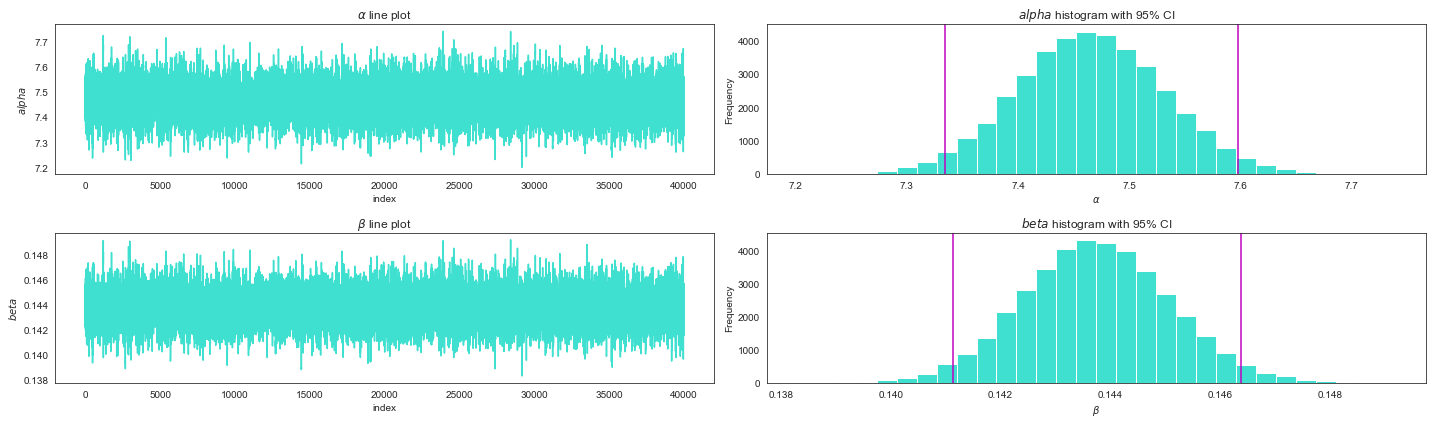

In [46]:
plt.figure(figsize=(20,6))
plt.subplot(2, 2, 1)
_ = plt.plot(alpha_samples, color='turquoise')
_ = plt.title(r'$\alpha$ line plot')
_ = plt.xlabel('index')
_ = plt.ylabel(r'$alpha$')
plt.subplot(2, 2, 2)
_ = plt.hist(alpha_samples, bins=30, color='turquoise')
_ = plt.xlabel(r'$\alpha$')
_ = plt.ylabel('Frequency')
_ = plt.title(r'$alpha$ histogram with 95% CI')
_ = plt.axvline(x=alpha_ci[0], c='m')
_ = plt.axvline(x=alpha_ci[1], c='m')
plt.subplot(2, 2, 3)
_ = plt.plot(beta_samples, color='turquoise')
_ = plt.title(r'$\beta$ line plot')
_ = plt.xlabel('index')
_ = plt.ylabel(r'$beta$')
plt.subplot(2, 2, 4)
_ = plt.hist(beta_samples, bins=30, color='turquoise')
_ = plt.xlabel(r'$\beta$')
_ = plt.ylabel('Frequency')
_ = plt.title(r'$beta$ histogram with 95% CI')
_ = plt.axvline(x=beta_ci[0], c='m')
_ = plt.axvline(x=beta_ci[1], c='m')
plt.tight_layout()

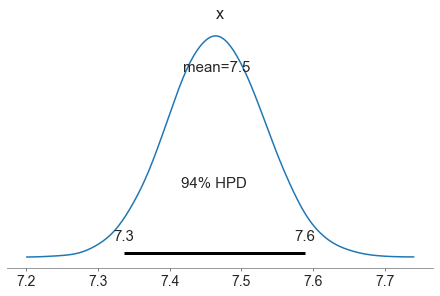

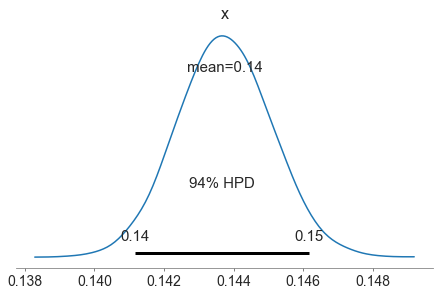

In [47]:
_ = pm.plots.plot_posterior(data=trace['alpha'])
_ = pm.plots.plot_posterior(data=trace["beta"])

In [48]:
alpha_best = np.mean(alpha_samples)
beta_best = np.mean(beta_samples)
alpha_best, 1/beta_best


(7.465256701387036, 6.956907617912886)

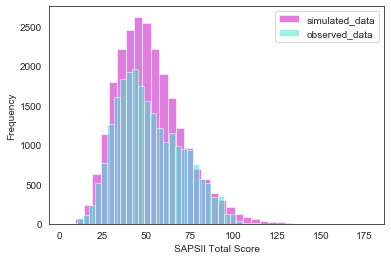

In [50]:
seed(47)
best_shot_simulated = gamma(alpha_best, scale=1/beta_best).rvs(n_deceased)
_ = plt.hist(best_shot_simulated, bins=35, alpha=0.5, color='m', label='simulated_data')
_ = plt.hist(deceased, bins=35, alpha=0.5, color='turquoise', label='observed_data')
_ = plt.xlabel('SAPSII Total Score')
_ = plt.ylabel('Frequency')
_ = plt.legend()